In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the data set which was cleaned earlier through R

In [357]:
df=pd.read_csv('survey_cleaned.csv')

In [358]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,Rarely,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,Often,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


####  Just having a look at the data for null values

In [359]:
df.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

# Univariate analysis to be continued

C:\Users\ankus\AppData\Local\Temp\ipykernel_17220\67277293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],hist=False)


Text(0.5, 1.0, 'Distribution plot for age')

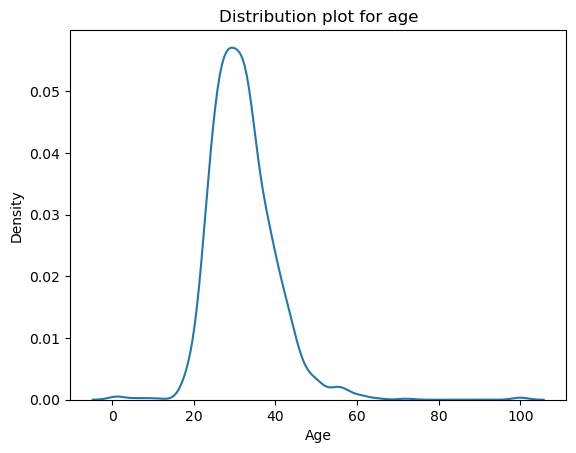

In [360]:
sns.distplot(df['Age'],hist=False)
plt.title("Distribution plot for age")

Text(0.5, 1.0, ' Count plot for responses in Work_ interfere')

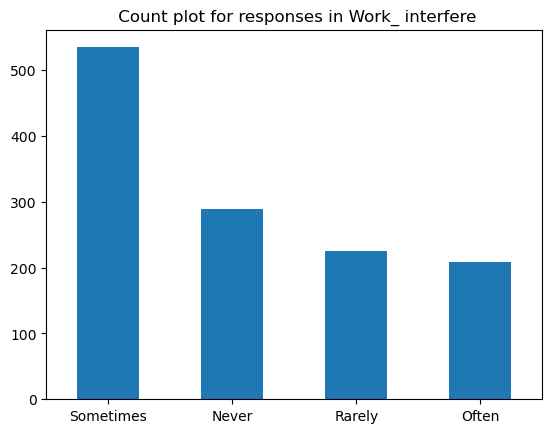

In [361]:
df['work_interfere'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title(" Count plot for responses in Work_ interfere")

### Here "Sometimes" means whether a person feels that work interference could be a possiblity causing mental stress if any 

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

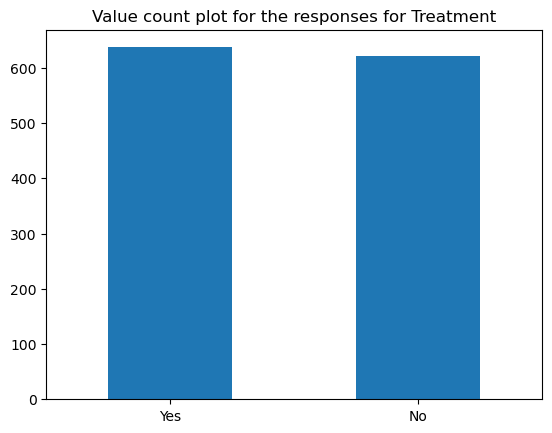

In [362]:
df["treatment"].value_counts().plot(kind='bar')
plt.title("Value count plot for the responses for Treatment")
plt.xticks(rotation=0)

### Treatment attribute  tells us whether the respondent has replied to the question "Yes" or "No" on whether he has taken any treatement on mental health or not

### To get value count plot for all the categorical columns selecting all the column names and storing them in a list 

In [363]:
l=list(df.select_dtypes(include='object').columns)

In [364]:
l=l[1:]

In [365]:
l

['Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

### Since we have country and state which has many values we wont be plotting a count plot for it

In [366]:
l.remove("Country")


In [367]:
l.remove("state")

### Converting one list into 8 so that while looping and visualizing the plot it becomes easy and clear to understand

In [368]:
l1=l[:3]
l2=l[3:6]
l3=l[6:9]
l4=l[9:12]
l5=l[12:15]
l6=l[15:18]
l7=l[18:21]
l8=l[21:24]

# Value counts for all the categorical columns present in the dataset

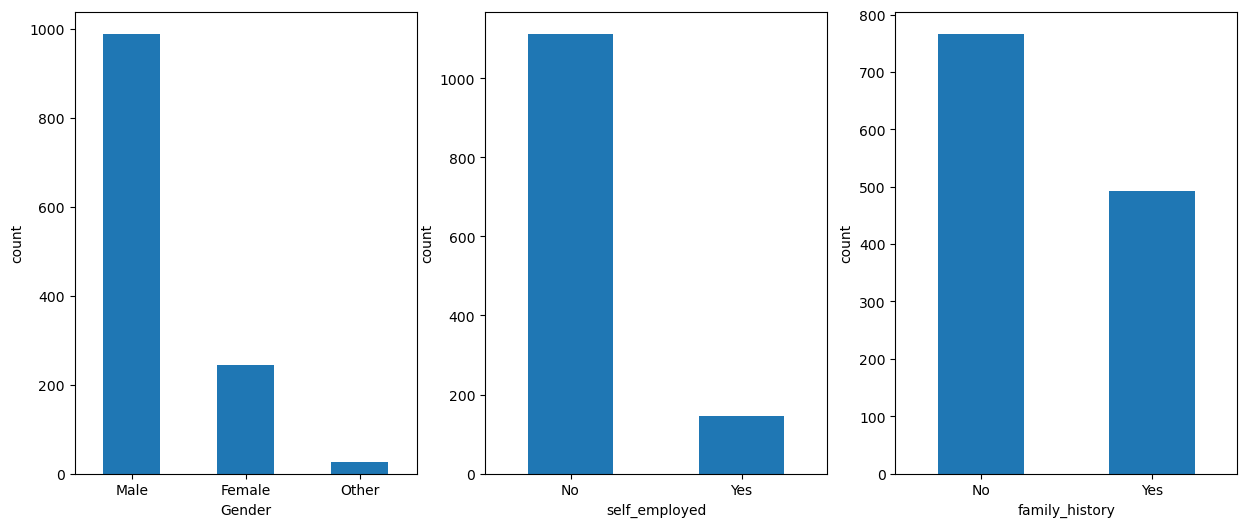

In [369]:
j=1
plt.figure(figsize=(15,6))
for i in l1:
    plt.subplot(1,3,j)
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel("count")
    plt.xticks(rotation=0)
    j=j+1

### Self_employed: Talks about whether a respondent of the survey works for a company or has his own business 

### Family_history: This attribute talks about whether the respondent has a family history for mental health issues or not

In [370]:
l2

['treatment', 'work_interfere', 'no_employees']

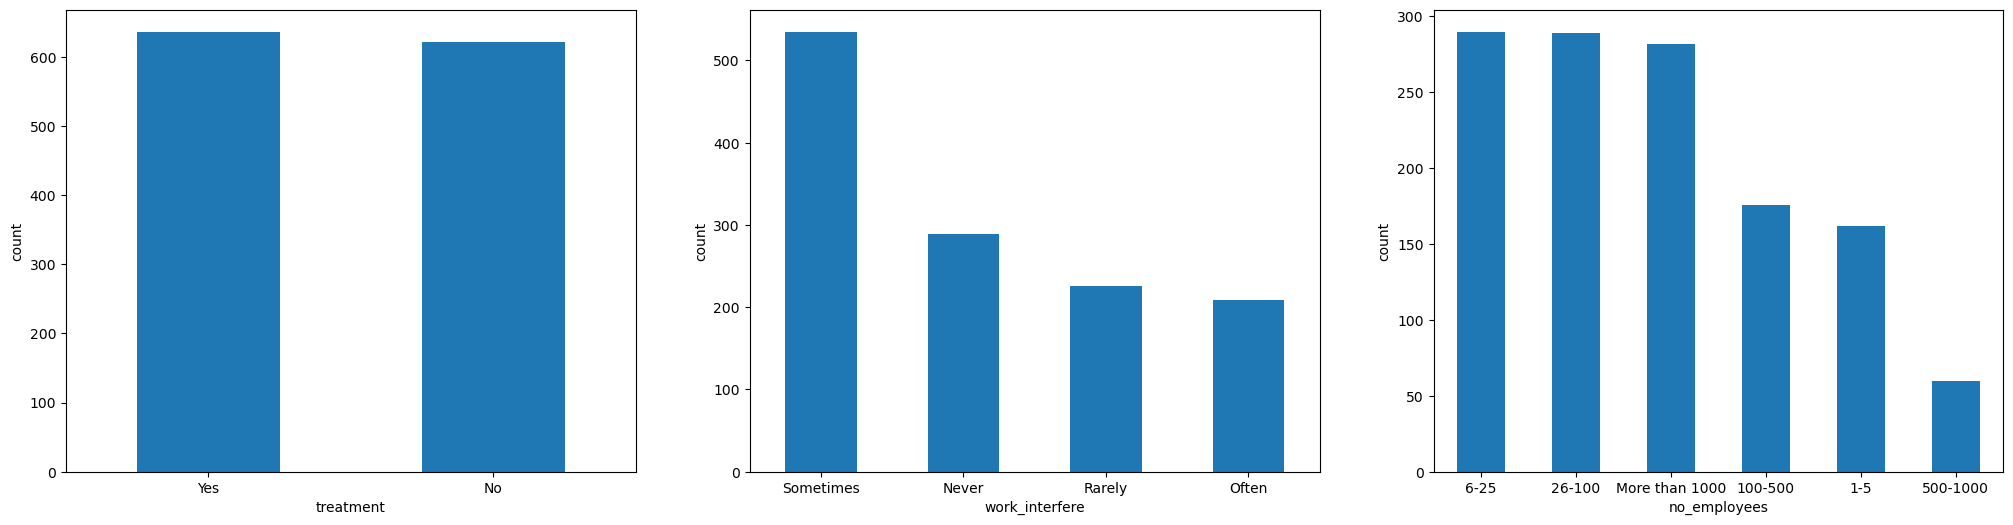

In [371]:
j=1

plt.figure(figsize=(25,6))
for i in l2:
    plt.subplot(1,3,j)
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel("count")
    plt.xticks(rotation=0)
    j=j+1

### Treatment and Work_interfere columns have explained above 

### No_employees: This attribute talks about the number of employees present at the workplace for the respondent

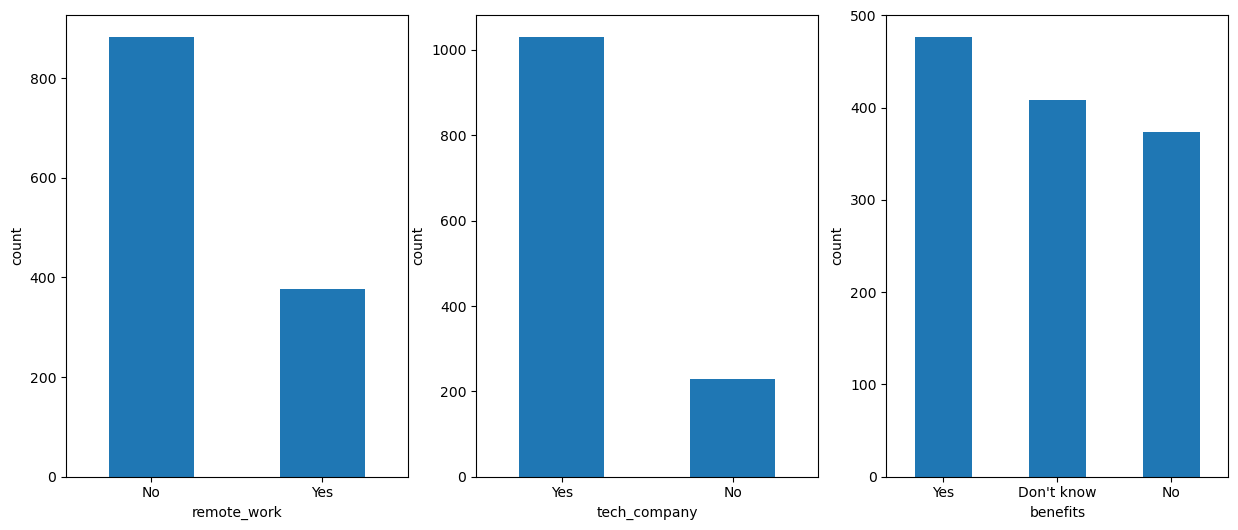

In [372]:
j=1
plt.figure(figsize=(15,6))
for i in l3:
    plt.subplot(1,3,j)
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel("count")
    plt.xticks(rotation=0)
    j=j+1

### Remote_work: This attribute talks about whether the person works remotely or goes to office for work

### Tech_company: This attribute tells us whether the person works at a tech company or not

###  Benefits: This is an opinion question on whether the respondent believes that the employer would provide benefits if the respondent were to have mental health concerns 

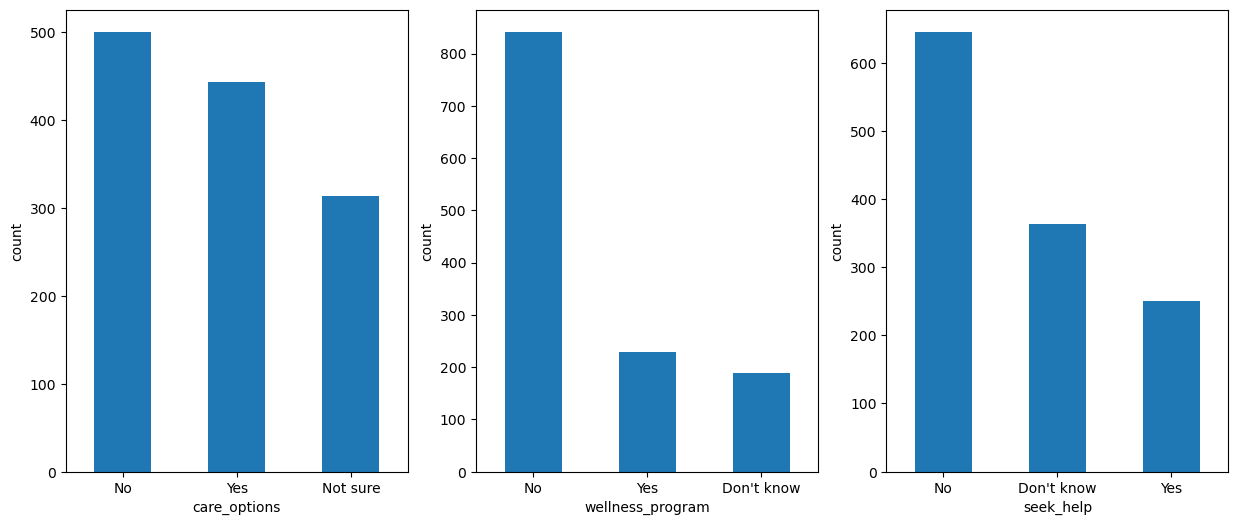

In [373]:
j=1
plt.figure(figsize=(15,6))
for i in l4:
    plt.subplot(1,3,j)
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel("count")
    plt.xticks(rotation=0)
    j=j+1

### Care_options:   This is an opinion question on whether the respondent believes that the employer would provide care options if the respondent were to have mental health concerns

### Wellness program : This is an opinion question on whether the respondent believes that the employer would have mental health concerns included in a wellness program

### Seek_help:  This is an opinion question on whether the respondent believes that the employer would  help if the respondent were to have mental health concerns.

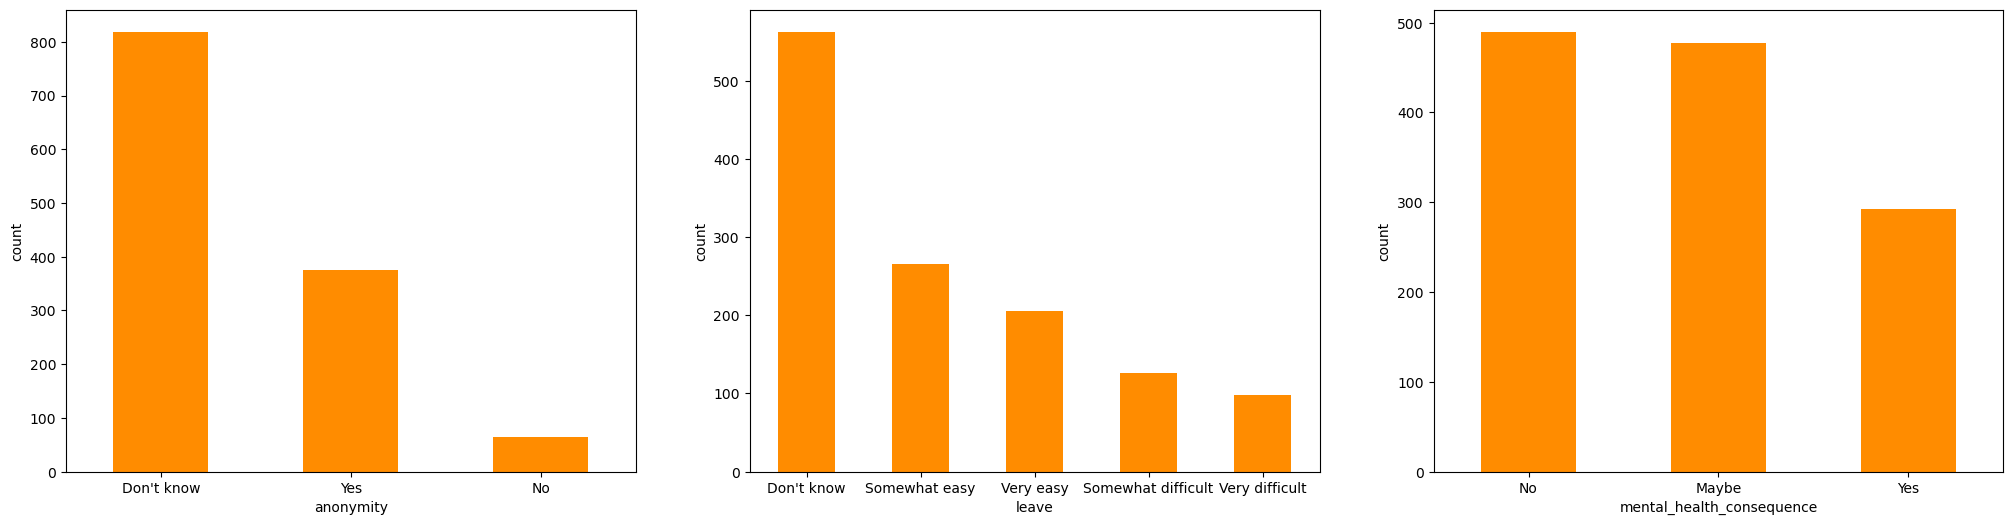

In [374]:
j=1
plt.figure(figsize=(25,6))
for i in l5:
    plt.subplot(1,3,j)
    df[i].value_counts().plot(kind='bar',color="darkorange")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.xticks(rotation=0)
    j=j+1

### Anonymity:  Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment?

### Leave : How easy is it for you to take medical leave for a mental health condition?

### mental_health_consequence:  Do you think that discussing a mental health issue with your employer would have negative consequences?

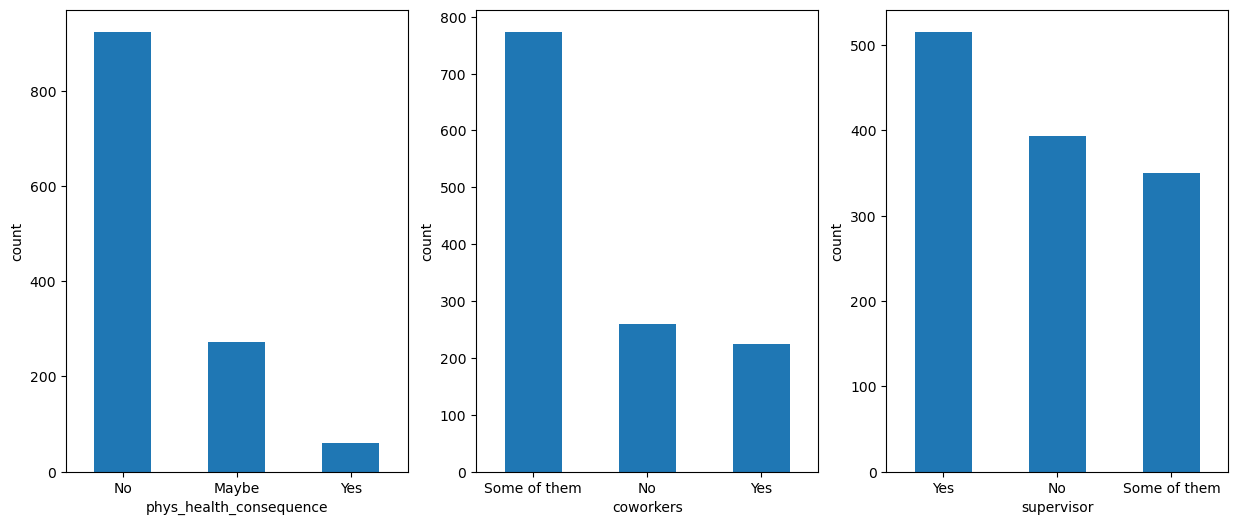

In [375]:
j=1
plt.figure(figsize=(15,6))
for i in l6:
    plt.subplot(1,3,j)
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel("count")
    plt.xticks(rotation=0)
    j=j+1

### Phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

### coworkers: Would you be willing to discuss a mental health issue with your coworkers?

### supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

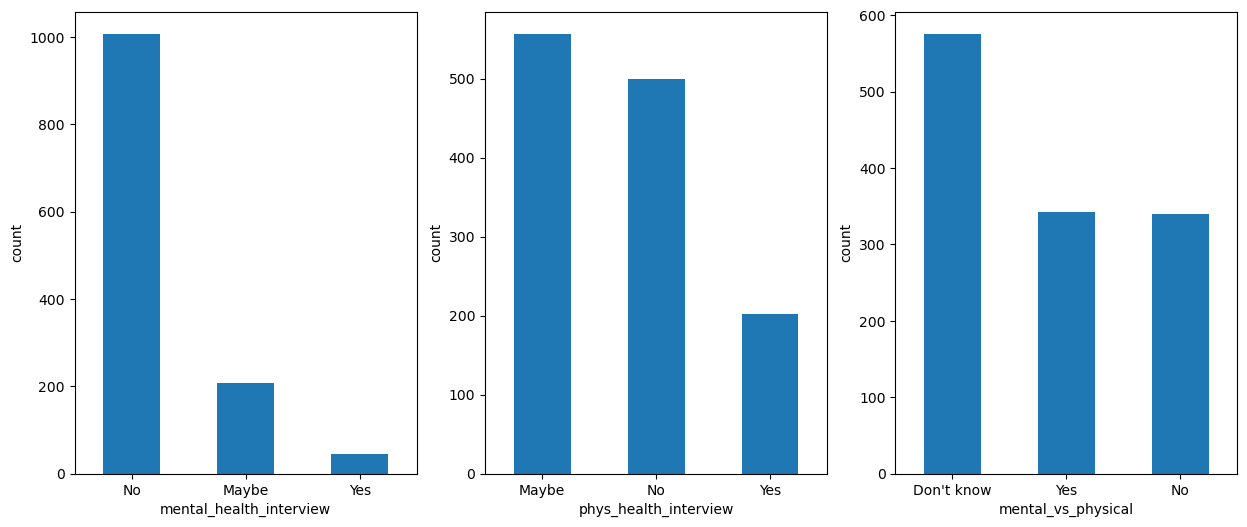

In [376]:
j=1
plt.figure(figsize=(15,6))
for i in l7:
    plt.subplot(1,3,j)
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel("count")
    plt.xticks(rotation=0)
    j=j+1

### mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

### phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?


### Mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

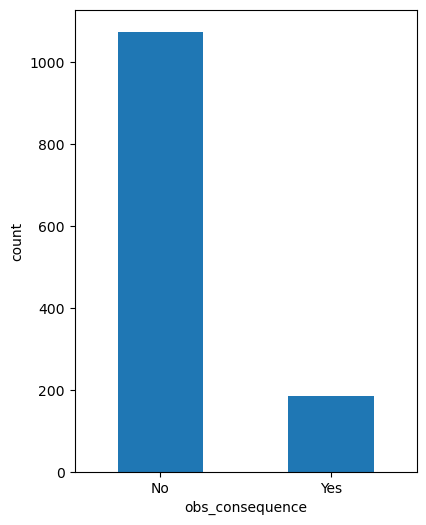

In [377]:
j=1
plt.figure(figsize=(15,6))
for i in l8:
    plt.subplot(1,3,j)
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel("count")
    plt.xticks(rotation=0)
    j=j+1

### obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace

# So now moving towards understanding country column as it is what our first research question talks about

In [378]:
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [379]:
df['Country'].nunique()

48

### So  now as we can see that there are 48 different countries in the dataset, grouping them and analyzing will be a better idea 

### For example countries with double digit number of times in the dataset can be grouped up, U.S can be a seperate category and rest others could be in a  seperate category so total we could have three categories

In [380]:
df['Country'].replace(['United Kingdom','Canada','Germany','Netherlands','Ireland','Australia','France','India'],'Tier2',inplace=True)

In [381]:
df['Country'].value_counts()

United States             751
Tier2                     400
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Mexico                      3
Finland                     3
Austria                     3
Denmark                     2
Colombia                    2
Portugal                    2
Greece                      2
Croatia                     2
Thailand                    1
Moldova                     1
Bahamas, The                1
Georgia                     1
China                       1
Czech Republic              1
Norway                      1
Zimbabwe                    1
Nigeria                     1
Japan                       1
Hungary                     1
Bosnia and

### Function to convert rest of the  countries into Tier3 value

In [382]:
def categorizing(Country):
    if(Country not in ['Tier2','United States']):
        return 'Tier3' 
    else:
        return Country
df['Countries']=df['Country'].apply(categorizing)

### Changed value counts 

In [383]:
df['Countries'].value_counts()

United States    751
Tier2            400
Tier3            108
Name: Countries, dtype: int64

# First Research Question

### So when it comes to providing support, Its about the support that a particular company of a country gives to its employees Either thorugh  Benefits, Care options and Wellness programs

### Looking for Benefits accross different countries through a stacked plot

Text(0.5, 1.0, 'Benefits vs Type of Countries')

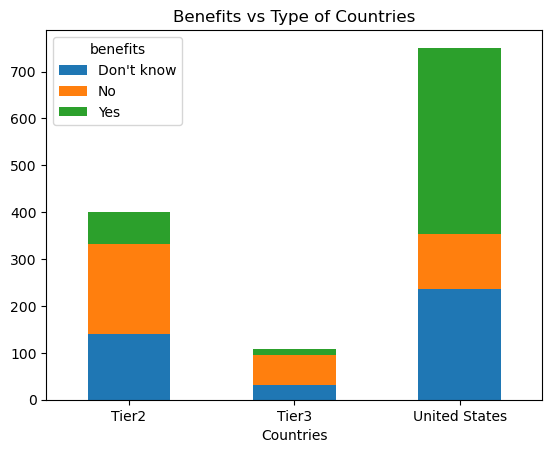

In [384]:

st=df.groupby(['Countries'])['benefits'].value_counts().unstack()
st.plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title("Benefits vs Type of Countries")

### Similarly for the  Care options attribute

Text(0.5, 1.0, 'Care options vs Type of Countries')

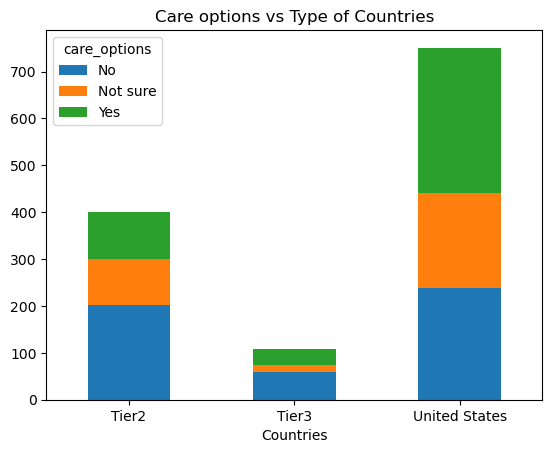

In [385]:
st2=df.groupby(['Countries'])['care_options'].value_counts().unstack()
st2.plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title("Care options vs Type of Countries")

### Wellness Program

Text(0.5, 1.0, ' Wellness program vs Type of Country')

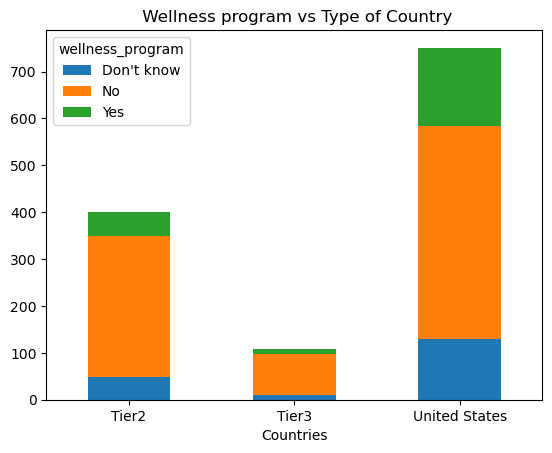

In [386]:
st2=df.groupby(['Countries'])['wellness_program'].value_counts().unstack()
st2.plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title(" Wellness program vs Type of Country")

# Combined effect of Benefits and Wellness programs

Text(0.5, 1.0, 'Mental health disccusion as part of wellness program  not done')

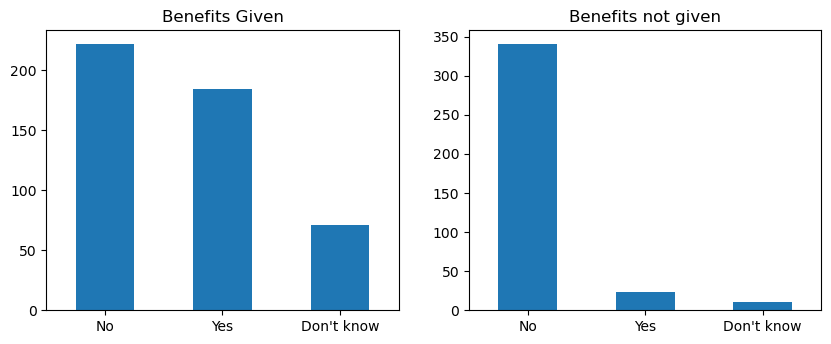

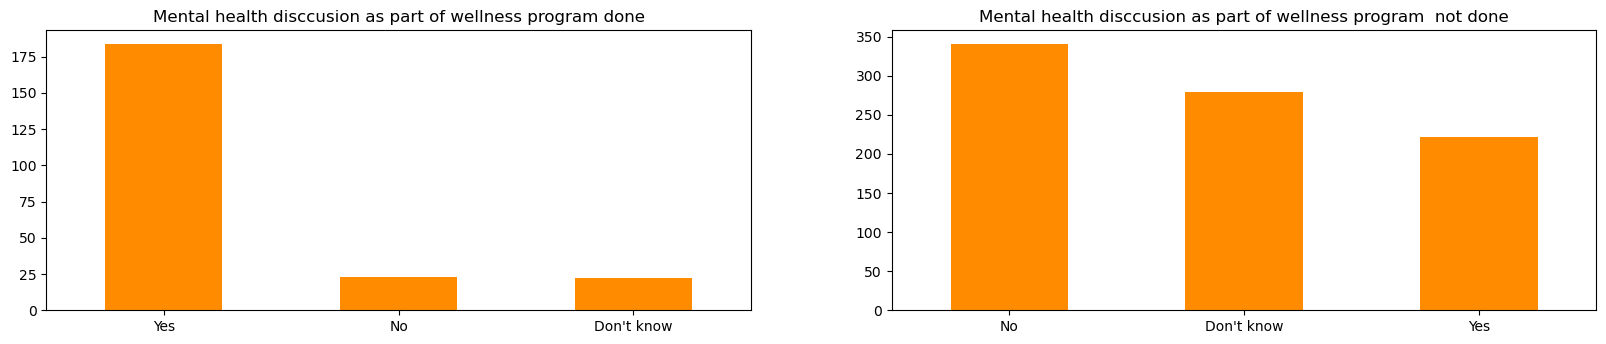

In [387]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
df[df['benefits']=='Yes']['wellness_program'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Benefits Given")
plt.subplot(2,2,2)
df[df['benefits']=='No']['wellness_program'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Benefits not given")
plt.figure(figsize=(20,8))
plt.subplot(2,2,3)
df[df['wellness_program']=='Yes']['benefits'].value_counts().plot(kind='bar',color='darkorange')
plt.xticks(rotation=0)
plt.title("Mental health disccusion as part of wellness program done")
plt.subplot(2,2,4)
df[df['wellness_program']=='No']['benefits'].value_counts().plot(kind='bar',color='darkorange')
plt.xticks(rotation=0)
plt.title("Mental health disccusion as part of wellness program  not done")

### Value counts combination for each attribute 

In [388]:
df.groupby(['Countries'])[['benefits','wellness_program']].value_counts()


Countries      benefits    wellness_program
Tier2          No          No                  172
               Don't know  No                   95
                           Don't know           36
               Yes         No                   33
                           Yes                  27
               No          Yes                  14
               Don't know  Yes                  10
               Yes         Don't know            7
               No          Don't know            6
Tier3          No          No                   59
               Don't know  No                   22
                           Don't know            8
               Yes         No                    6
               No          Yes                   5
               Yes         Yes                   5
               Don't know  Yes                   1
               No          Don't know            1
               Yes         Don't know            1
United States  Yes         No         

### Value counts considering Wellness program response to be "Yes" and "No"

Text(0.5, 1.0, 'Mental health disccusion as part of wellness program  not done')

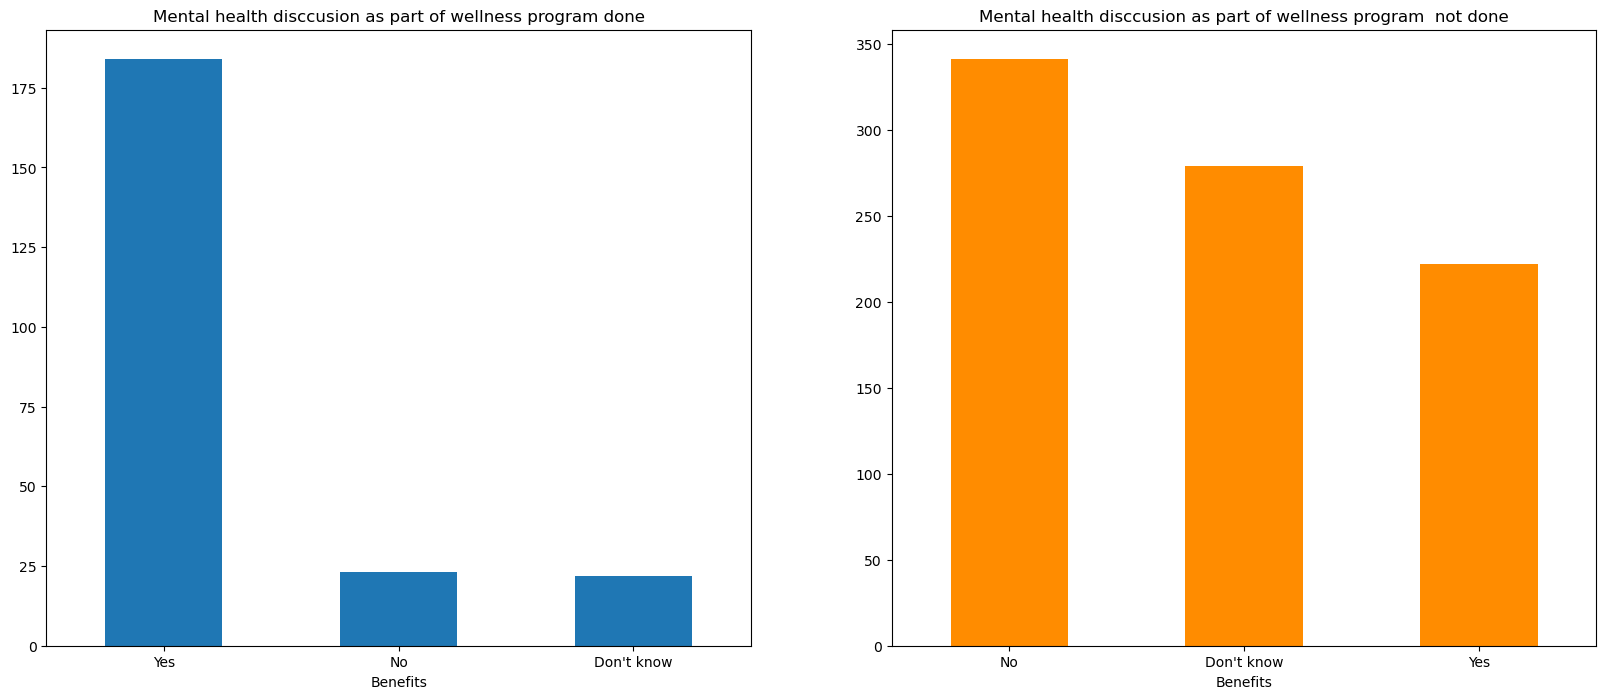

In [389]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df[df['wellness_program']=='Yes']['benefits'].value_counts().plot(kind='bar')
plt.xlabel("Benefits")
plt.xticks(rotation=0)
plt.title("Mental health disccusion as part of wellness program done")
plt.subplot(1,2,2)
df[df['wellness_program']=='No']['benefits'].value_counts().plot(kind='bar',color='darkorange')
plt.xlabel("Benefits")
plt.xticks(rotation=0)
plt.title("Mental health disccusion as part of wellness program  not done")

In [390]:
### Modeling through decision tree to predict the category of country based on wellness, benefits and care options

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [392]:
y=df['Countries']
X=df[["benefits","care_options","wellness_program"]]

In [393]:
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [395]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier()



In [396]:
# Train the model on the training set
model.fit(X_train, y_train)


DecisionTreeClassifier()

### Computing model and understanding the results

In [397]:

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Other metrics for classification problem
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(cm)

print(f1,recall,precision)


Accuracy: 0.6944444444444444
[[ 29   0  45]
 [ 13   0   8]
 [ 11   0 146]]
0.6451212559104269 0.6944444444444444 0.6177638717697502


C:\Users\ankus\anac\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### To make sure that there is some reliability to the results Cross validation is done

In [398]:
from sklearn.model_selection import cross_val_score,KFold

In [399]:
cv_results_dt=cross_val_score(model,X_encoded,y, cv=KFold(n_splits=5, shuffle=True, random_state=42))

In [400]:
cv_results_dt

array([0.69444444, 0.67460317, 0.6468254 , 0.66269841, 0.6812749 ])

In [401]:
cv_results_dt.mean()

0.6719692657939669

### As per the decision tree model for research question we can predict the category of country with the help of support attributes upto 67% reliable

### Results through Visualizations

### 1)Firstly, Compared to Tier 2 and Tier 3 countries, where it appears that only around 10-20% working population believe they would be getting benefits, In United states its more than 50%   of the respondents. Another fascinating aspect of the visualization is that respondents of   Tier 2 and Tier 3 would probably not be getting benefits as most of them are clear that there are no benefits. Whereas on the other hand in United states the proportion of people wouldn’t be getting benefits is lesser compared to the people unaware about which is something good for a developed country like U.S.
### 2) When it comes to Wellness program, we see a totally different picture be it Tier2, Tier3 or United states. It’s clear that people across the world have a common issue or at least have a perception that employers wouldn’t be discussing mental health as part of wellness programs

# 2nd reseach question : Do People coming from a certain background, age group or sex tend to be open to their supervisor regarding their mental health? 

### Working on  Age attribute

Text(0.5, 1.0, " People's opinion to be open to supervisor regrding mental health across different ages")

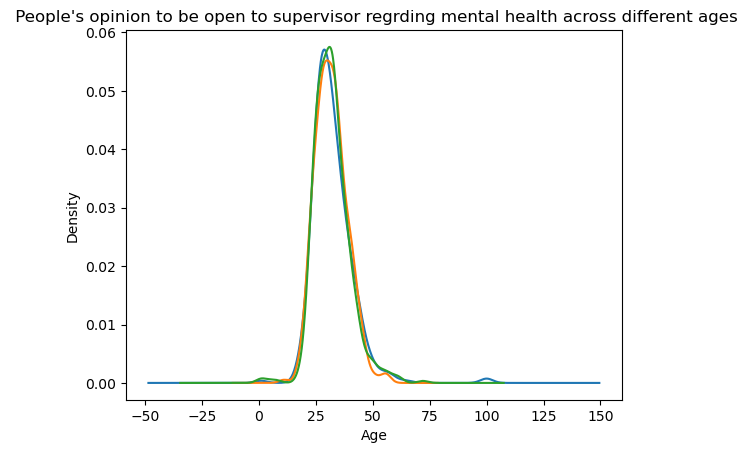

In [402]:
df.groupby(['supervisor'])['Age'].plot(kind='kde')
plt.xlabel("Age")
plt.title(" People's opinion to be open to supervisor regrding mental health across different ages")


### Trying to look on whether Country could answer this question 

Text(0, 0.5, 'Count')

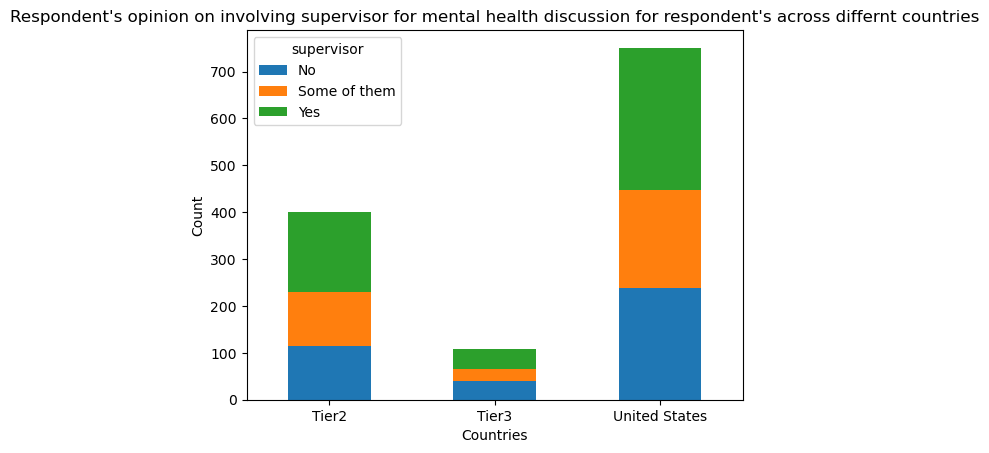

In [403]:
st_s=df.groupby(['Countries'])['supervisor'].value_counts().unstack()
st_s.plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title("Respondent's opinion on involving supervisor for mental health discussion for respondent's across differnt countries")
plt.xlabel("Countries")
plt.ylabel("Count")

In [404]:
df.groupby(['Countries'])['supervisor'].value_counts()

Countries      supervisor  
Tier2          Yes             170
               No              115
               Some of them    115
Tier3          Yes              42
               No               40
               Some of them     26
United States  Yes             304
               No              238
               Some of them    209
Name: supervisor, dtype: int64

In [405]:
df['Gender'].value_counts()

Male      989
Female    243
Other      27
Name: Gender, dtype: int64

In [406]:
df.groupby(['Gender'])['supervisor'].value_counts()

Gender  supervisor  
Female  No               86
        Some of them     83
        Yes              74
Male    Yes             434
        No              301
        Some of them    254
Other   Some of them     13
        Yes               8
        No                6
Name: supervisor, dtype: int64

### Stacked bar plot to understand the proportion of males and females in their opinion towards supervisor

Text(0.5, 1.0, "Respondent's openness towards supervisor for different genders ")

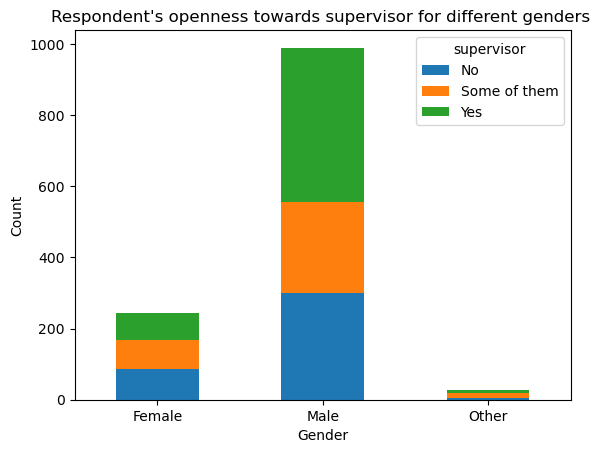

In [407]:
df.groupby(['Gender'])['supervisor'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Respondent's openness towards supervisor for different genders ")

### Random forest model to predict the response of a respondent to a supervisor depending upon his age sex and the country he belongs to

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [409]:
X_rf = df[['Age', 'Countries', 'Gender']]
y_rf = df['supervisor']

In [410]:
# Use LabelEncoder to convert categorical variables to numerical values
label_encoder_rf = LabelEncoder()
X_rf_encoded = X_rf.copy()  # Creating a copy

# LabelEncoder to categorical columns
X_rf_encoded['Countries'] = label_encoder_rf.fit_transform(X_rf['Countries'])
X_rf_encoded['Gender'] = label_encoder_rf.fit_transform(X_rf['Gender'])

# Split the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf_encoded, y_rf, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model_rf.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_rf)

### Accuracies of the random forest model for 2nd research question

In [411]:
# Other classification metrics
print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

          No       0.33      0.20      0.25        90
Some of them       0.15      0.15      0.15        54
         Yes       0.48      0.65      0.55       108

    accuracy                           0.38       252
   macro avg       0.32      0.33      0.32       252
weighted avg       0.36      0.38      0.36       252


Confusion Matrix:
[[18 24 48]
 [18  8 28]
 [18 20 70]]


### Checking the results of the model using cross validation

In [412]:
cv_results=cross_val_score(model_rf,X_rf_encoded,y_rf,cv=KFold(n_splits=5, shuffle=True, random_state=42))

In [413]:
cv_results

array([0.38888889, 0.38888889, 0.37301587, 0.42063492, 0.36653386])

In [414]:
cv_results.mean()

0.3875924871940808

### So we get to know that using the above three variabls predictions for whether a person will be open to supervisor or not are not  reliable

### Results through Visualization

### We can see that there are about 243 females out of 1259 respondents which makes it to about 19.3% of the respondents Now as per the stats it’s clear that when it comes to Males, they tend to feel more open towards discussing mental health with any of their supervisor compared to women. 
### About 44% of males have a positive response towards supervisors, whereas only 31% of women feel they could talk to their supervisor’s. Moreover 35% of females feel they can’t talk about mental health to any of the supervisor, while only 30% of male respondents felt as such, which kind of reinstated the fact that across background and age females didn’t feel safe to talk about mental health to their supervisors


# 3rd Research Question : What’s the general opinion difference between people coming from tech and non tech regarding mental health or in other words is Tech industry across gender, age and background creating an environment not suitable for better mental health?

In [415]:
df['tech_company'].value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

### Now we can see that most of the surveyed people belong to tech company

# Trial with Observed consequence

Text(0.5, 1.0, ' Any observed consequence regarding mental health at the work place for tech vs non tech respondents')

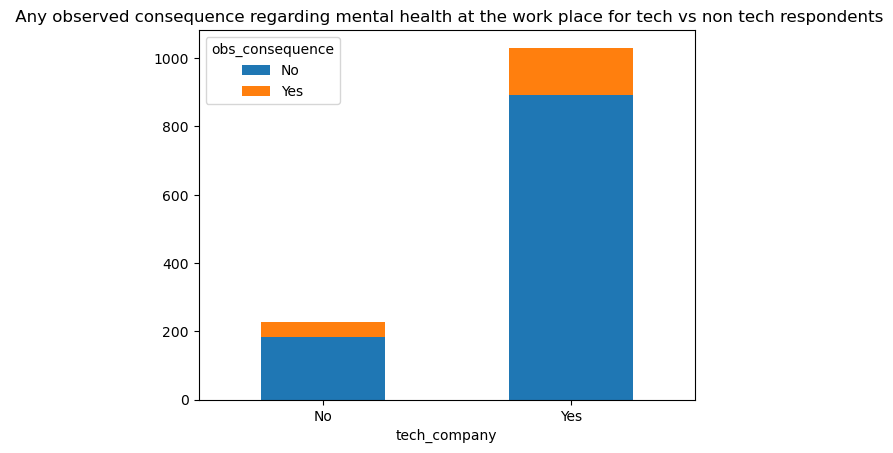

In [416]:
df.groupby(['tech_company'])['obs_consequence'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title(" Any observed consequence regarding mental health at the work place for tech vs non tech respondents")

In [417]:
df['obs_consequence'].value_counts()

No     1075
Yes     184
Name: obs_consequence, dtype: int64

### Not much variability to understand from the observed consequence reponses

# Trial-2 with Family history attribute

In [418]:
df['family_history'].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

In [419]:
df.groupby(['tech_company'])['family_history'].value_counts()

tech_company  family_history
No            No                128
              Yes               100
Yes           No                639
              Yes               392
Name: family_history, dtype: int64

Text(0.5, 1.0, 'Family History vs tech company')

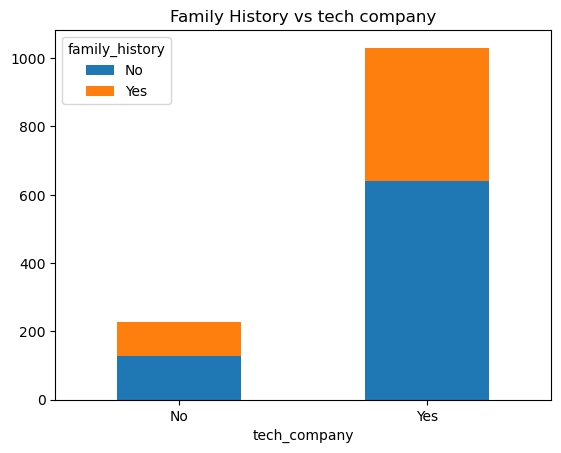

In [420]:
df.groupby(['tech_company'])['family_history'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title("Family History vs tech company")

### we can observe  that the people not working at a tech company are more likely to have a family history of mental health issue, for non tech respondents its about 43% chance and for a tech respondent to be 38%.

# Checking for response about Co workers on  being differentiator for tech and non tech company 

In [421]:
df['coworkers'].value_counts()

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

In [422]:
df.groupby(['tech_company'])['coworkers'].value_counts()

tech_company  coworkers   
No            Some of them    143
              No               57
              Yes              28
Yes           Some of them    631
              No              203
              Yes             197
Name: coworkers, dtype: int64

Text(0.5, 1.0, 'Stacked plot for responses of people towards coworkers vs the workplace they work at')

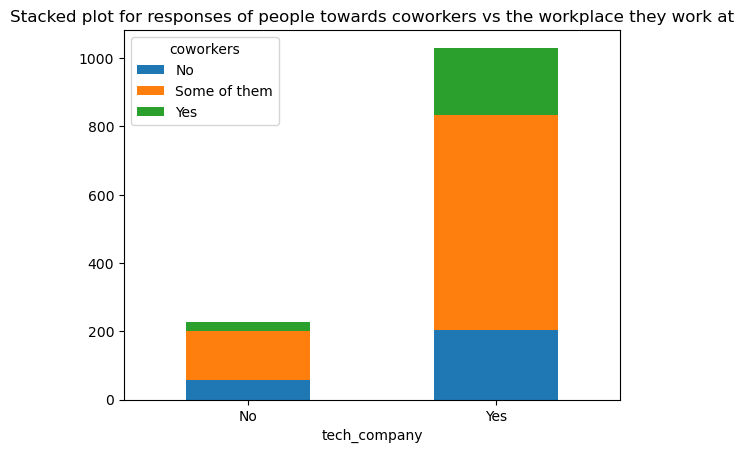

In [423]:
df.groupby(['tech_company'])['coworkers'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title("Stacked plot for responses of people towards coworkers vs the workplace they work at")

### Nothing significant could be found out through the plot 

# Now Experimenting with Mental_vs_Physical as an opinion differentiator

In [424]:
df['mental_vs_physical'].value_counts()

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

In [425]:
df.groupby(['tech_company'])['mental_vs_physical'].value_counts()

tech_company  mental_vs_physical
No            Don't know             98
              No                     86
              Yes                    44
Yes           Don't know            478
              Yes                   299
              No                    254
Name: mental_vs_physical, dtype: int64

Text(0.5, 1.0, 'Mental issue as serious as physical for tech or non tech')

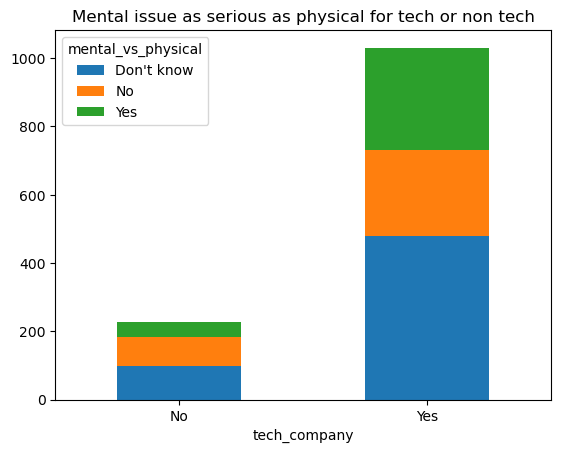

In [426]:
df.groupby(['tech_company'])['mental_vs_physical'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title("Mental issue as serious as physical for tech or non tech")

### Applying decision tree to predict whether a respondent is from Tech company or not  with the help of the four attributes since the output here is a binary response "Yes" or "No"

In [427]:
X_dt=df[['mental_vs_physical','family_history']]
y_dt=df['tech_company']

### Applying transformation before giving it to decision tree  model

In [428]:


# Assuming df is your DataFrame with the given structure
X_dt = df[['obs_consequence', 'mental_vs_physical', 'coworkers', 'family_history']]
y_dt = df['tech_company']

label_encoder_dt = LabelEncoder()
X_dt_encoded = X_dt.copy()  # Create a copy to avoid modifying the original DataFrame


for column in X_dt.columns:
    X_dt_encoded[column] = label_encoder_dt.fit_transform(X_dt[column])

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt_encoded, y_dt, test_size=0.2, random_state=42)


model_dt = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model_dt.fit(X_train_dt, y_train_dt)



DecisionTreeClassifier(random_state=42)

### Accuracies for the  third research question through decision tree model 

In [429]:
# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test_dt)

# Evaluate the accuracy of the model
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Accuracy: {accuracy_dt}")

# Other classification metrics
print("\nClassification Report:")
print(classification_report(y_test_dt, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_dt, y_pred_dt))


Accuracy: 0.8214285714285714

Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.02      0.04        46
         Yes       0.82      1.00      0.90       206

    accuracy                           0.82       252
   macro avg       0.91      0.51      0.47       252
weighted avg       0.85      0.82      0.74       252


Confusion Matrix:
[[  1  45]
 [  0 206]]


### Cross validation results

In [430]:
cv_results_dt3=cross_val_score(model_dt,X_dt_encoded,y_dt,cv=KFold(n_splits=5, shuffle=True, random_state=42))

In [431]:
cv_results.mean()

0.3875924871940808

### After checking for many attributes throughout the dataset only these three attributes looked to be the most co related to differentiate between tech and non tech and this is the accuracy we get

### So, the insight that we get through this opinion is in comparison to tech companies non tech companies employers tend to give physical health more importance than mental health, which is the opposite for tech companies.